In [1]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# read the pkl file
with open('../tracker_stubs/ball_detections.pkl', 'rb') as f:
    ball_positions = pickle.load(f)

In [7]:
ball_positions = [x.get(1, []) for x in ball_positions]
# convert the list into pandas dataframe
df_ball_positions = pd.DataFrame(ball_positions, columns=['x1', 'y1', 'x2', 'y2'])

# interpolate the missing values
df_ball_positions = df_ball_positions.interpolate()
df_ball_positions = df_ball_positions.bfill()

ball_positions = [{1: x} for x in df_ball_positions.to_numpy().tolist()]

In [9]:
df_ball_positions['mid_y'] = (df_ball_positions['y1'] + df_ball_positions['y2'])/2
df_ball_positions['mid_y_rolling_mean'] = df_ball_positions['mid_y'].rolling(window=5, min_periods=1, center=False).mean()

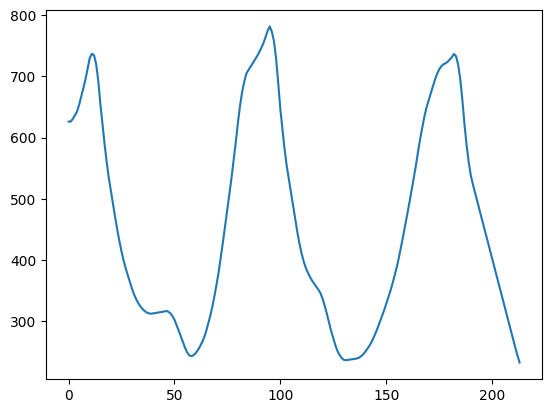

In [10]:
# plot mid_y_rolling_mean
plt.plot(df_ball_positions['mid_y_rolling_mean'])

In [11]:
df_ball_positions['delta_y'] = df_ball_positions['mid_y_rolling_mean'].diff()

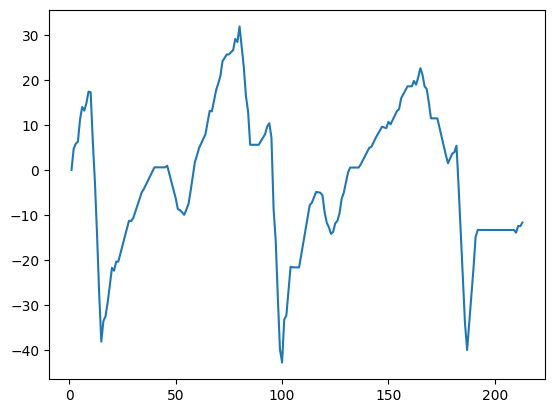

In [13]:
plt.plot(df_ball_positions['delta_y'])

In [14]:
df_ball_positions['ball_hit'] = 0

In [20]:
minimum_change_frames_for_hit = 25

for i in range(1, len(df_ball_positions) - int(minimum_change_frames_for_hit * 1.2)):
    negative_position_change = df_ball_positions['delta_y'].iloc[i] > 0 and df_ball_positions['delta_y'].iloc[i + 1] < 0
    positive_position_change = df_ball_positions['delta_y'].iloc[i] < 0 and df_ball_positions['delta_y'].iloc[i + 1] > 0

    if negative_position_change or positive_position_change:
        change_count = 0
        for change_frame in range(i + 1, i + int(minimum_change_frames_for_hit * 1.2) + 1):
            negative_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] > 0 and df_ball_positions['delta_y'].iloc[change_frame] < 0
            positive_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] < 0 and df_ball_positions['delta_y'].iloc[change_frame] > 0

            if negative_position_change and negative_position_change_following_frame:
                change_count += 1
            elif positive_position_change and positive_position_change_following_frame:
                change_count += 1

        if change_count > minimum_change_frames_for_hit - 1:
            df_ball_positions.at[i, 'ball_hit'] = 1

In [22]:
df_ball_positions[df_ball_positions['ball_hit'] ==1]

,x1,y1,x2,y2,mid_y,mid_y_rolling_mean,delta_y,ball_hit
11,777.374023,718.134399,796.292114,738.051270,728.092834,736.938513,6.446509,1
58,924.993359,241.092664,938.082837,254.258459,247.675562,242.719352,-1.471376,1
95,616.117065,776.303101,638.723877,802.355713,789.329407,781.422812,7.169788,1
131,714.352966,230.548991,728.810201,244.017802,237.283396,236.221914,-0.547157,1
182,1293.483154,738.467773,1314.975098,759.628540,749.048157,736.597345,5.373334,1


In [24]:
df_ball_positions[df_ball_positions['ball_hit'] ==1].index.tolist()

[11, 58, 95, 131, 182]

In [25]:
frame_nums_with_ball_hits = df_ball_positions[df_ball_positions['ball_hit']==1].index.tolist()

In [26]:
frame_nums_with_ball_hits

[11, 58, 95, 131, 182]